In [637]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('ggplot')

In [638]:
IBM = pd.read_csv('IBM.csv')
IBM.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [639]:
IBM.loc[IBM['Attrition'] == 'Yes', 'Attrition'] = 1

IBM.loc[IBM['Attrition'] == 'No', 'Attrition'] = 0

In [640]:
corr_matrix=IBM.corr()
corr_matrix

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


In [641]:
IBM.iloc[:,0:20].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632


In [642]:
IBM.iloc[:,20:35].head()

,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [643]:
#DataFrame Não Demitidos
NoAttrition = IBM.loc[(IBM['Attrition']==0)]
#DataFrame Demitidos
Attrition = IBM.loc[(IBM['Attrition']==1)]

In [644]:
#plt.figure(figsize=(13,5))
#plt.subplot(121)
#plt.hist(NoAttrition['YearsSinceLastPromotion'],bins=20, color='steelblue', density=True);
#plt.subplot(122)
#plt.hist(Attrition['YearsSinceLastPromotion'],bins=20, color='red', density=True);

In [645]:
IBM.iloc[:,0:20].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632


In [646]:
IBM.iloc[:,20:35].head()

,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [647]:
Attrition_RelationshipSatisfaction_JobInvolvement = pd.crosstab(Attrition['RelationshipSatisfaction'],Attrition['JobInvolvement'])

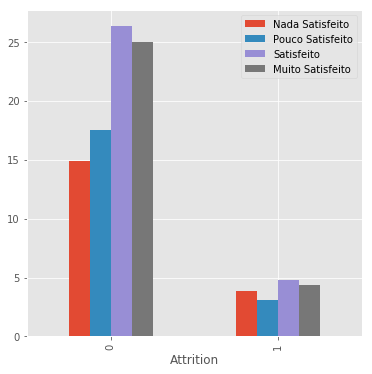

In [648]:
IBM_Attrition_RelationshipSatisfaction = (pd.crosstab(IBM['Attrition'],IBM['RelationshipSatisfaction'], rownames=['Attrition'], colnames=['RelationshipSatisfaction'], normalize=True)*100)
plot = IBM_Attrition_RelationshipSatisfaction.plot(kind='bar', figsize=(6,6))
plt.legend(['Nada Satisfeito','Pouco Satisfeito','Satisfeito','Muito Satisfeito'])
plt.show()

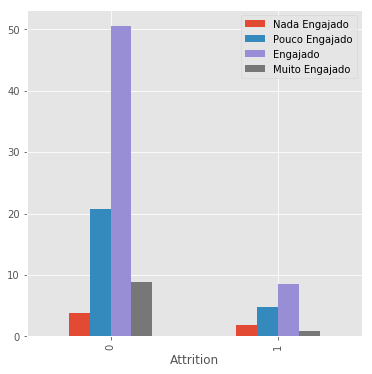

In [649]:
IBM_Attrition_JobInvolvement = pd.crosstab(IBM['Attrition'],IBM['JobInvolvement'], rownames=['Attrition'], colnames=['JobInvolvement'], normalize=True)*100
plot = IBM_Attrition_JobInvolvement.plot(kind='bar', figsize=(6,6))
plt.legend(['Nada Engajado','Pouco Engajado','Engajado','Muito Engajado'])
plt.show()

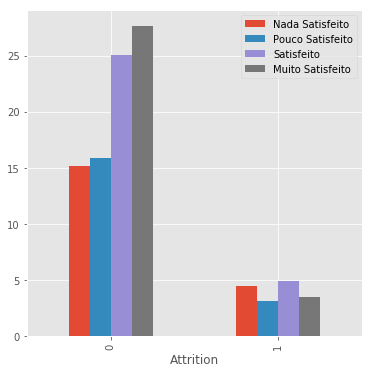

In [650]:
IBM_Attrition_JobSatisfaction = pd.crosstab(IBM['Attrition'],IBM['JobSatisfaction'], rownames=['Attrition'], colnames=['JobSatisfaction'], normalize=True)*100
plot = IBM_Attrition_JobSatisfaction.plot(kind='bar', figsize=(6,6))
plt.legend(['Nada Satisfeito','Pouco Satisfeito','Satisfeito','Muito Satisfeito'])
plt.show()

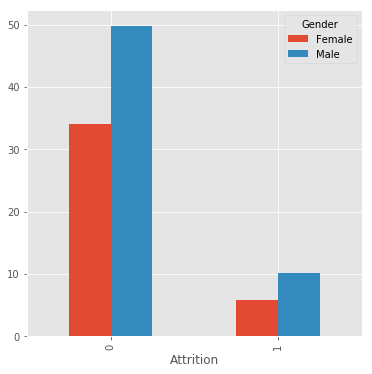

In [651]:
IBM_Attrition_Gender = pd.crosstab(IBM['Attrition'],IBM['Gender'], rownames=['Attrition'], colnames=['Gender'], normalize=True)*100
plot = IBM_Attrition_Gender.plot(kind='bar', figsize=(6,6))

plt.show()

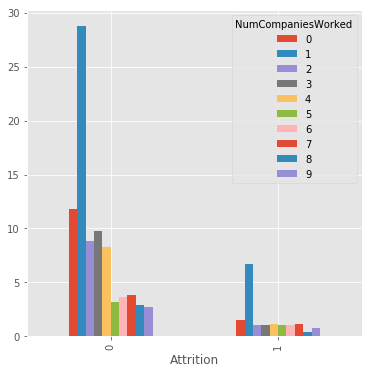

In [652]:
IBM_Attrition_NumCompaniesWorked = pd.crosstab(IBM['Attrition'],IBM['NumCompaniesWorked'], rownames=['Attrition'], colnames=['NumCompaniesWorked'], normalize=True)*100
plot = IBM_Attrition_NumCompaniesWorked.plot(kind='bar', figsize=(6,6))
plt.show()

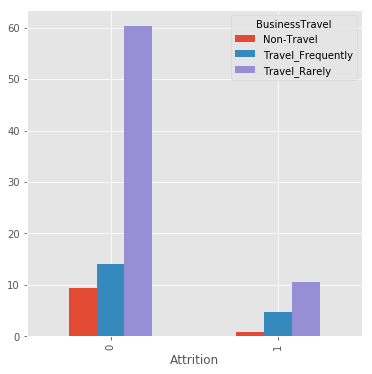

In [653]:
IBM_Attrition_BusinessTravel = pd.crosstab(IBM['Attrition'],IBM['BusinessTravel'], rownames=['Attrition'], colnames=['BusinessTravel'], normalize=True)*100
plot = IBM_Attrition_BusinessTravel.plot(kind='bar', figsize=(6,6))
plt.show()

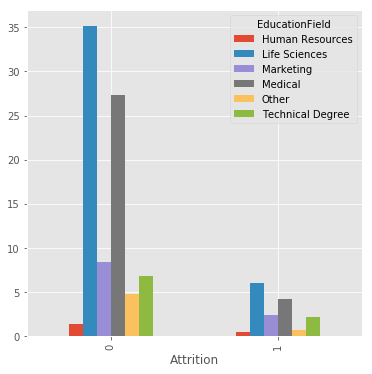

In [654]:
IBM_Attrition_EducationField = pd.crosstab(IBM['Attrition'],IBM['EducationField'], rownames=['Attrition'], colnames=['EducationField'], normalize=True)*100
plot = IBM_Attrition_EducationField.plot(kind='bar', figsize=(6,6))
plt.show()

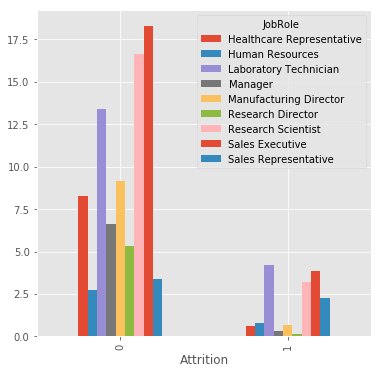

In [655]:
IBM_Attrition_JobRole = pd.crosstab(IBM['Attrition'],IBM['JobRole'], rownames=['Attrition'], colnames=['JobRole'], normalize=True)*100

plot = IBM_Attrition_JobRole.plot(kind='bar', figsize=(6,6))
plt.show()

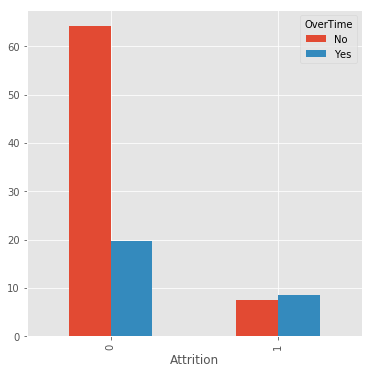

In [656]:
IBM_Attrition_OverTime = pd.crosstab(IBM['Attrition'],IBM['OverTime'], rownames=['Attrition'], colnames=['OverTime'], normalize=True)*100
plot = IBM_Attrition_OverTime.plot(kind='bar', figsize=(6,6))
plt.show()

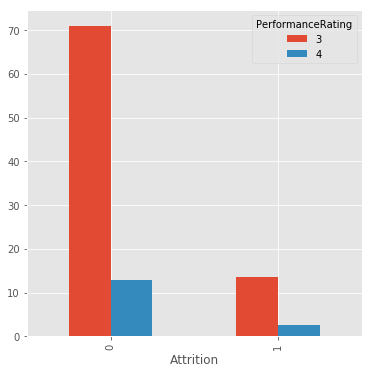

In [657]:
IBM_Attrition_PerformanceRating = pd.crosstab(IBM['Attrition'],IBM['PerformanceRating'], rownames=['Attrition'], colnames=['PerformanceRating'], normalize=True)*100
plot = IBM_Attrition_PerformanceRating.plot(kind='bar', figsize=(6,6))
plt.show()

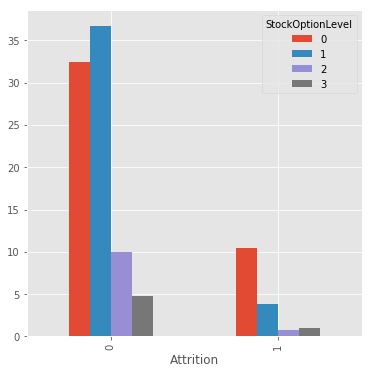

In [658]:
IBM_Attrition_StockOptionLevel = pd.crosstab(IBM['Attrition'],IBM['StockOptionLevel'], rownames=['Attrition'], colnames=['StockOptionLevel'], normalize=True)*100
plot = IBM_Attrition_StockOptionLevel.plot(kind='bar', figsize=(6,6))
plt.show()

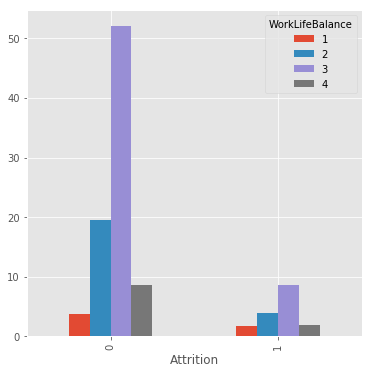

In [659]:
IBM_Attrition_WorkLifeBalance = pd.crosstab(IBM['Attrition'],IBM['WorkLifeBalance'], rownames=['Attrition'], colnames=['WorkLifeBalance'], normalize=True)*100
plot = IBM_Attrition_WorkLifeBalance.plot(kind='bar', figsize=(6,6))
plt.show()

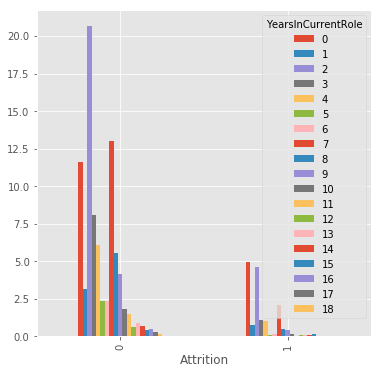

In [660]:
IBM_Attrition_YearsInCurrentRole = pd.crosstab(IBM['Attrition'],IBM['YearsInCurrentRole'], rownames=['Attrition'], colnames=['YearsInCurrentRole'], normalize=True)*100
plot = IBM_Attrition_YearsInCurrentRole.plot(kind='bar', figsize=(6,6))
plt.show()

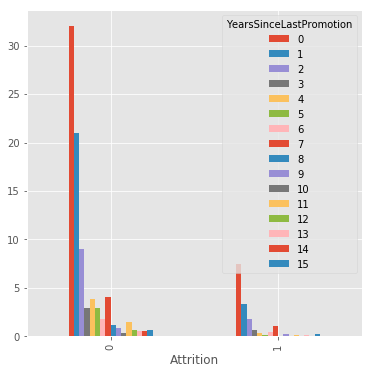

In [661]:
IBM_Attrition_YearsSinceLastPromotion = pd.crosstab(IBM['Attrition'],IBM['YearsSinceLastPromotion'], rownames=['Attrition'], colnames=['YearsSinceLastPromotion'], normalize=True)*100
plot = IBM_Attrition_YearsSinceLastPromotion.plot(kind='bar', figsize=(6,6))
plt.show()

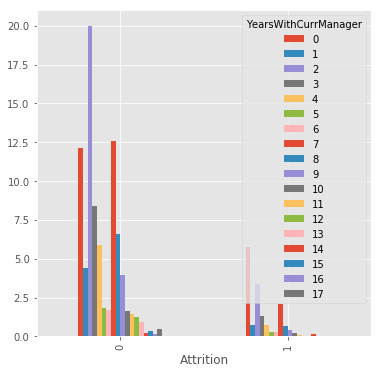

In [662]:
IBM_Attrition_YearsWithCurrManager = pd.crosstab(IBM['Attrition'],IBM['YearsWithCurrManager'], rownames=['Attrition'], colnames=['YearsWithCurrManager'], normalize=True)*100
plot = IBM_Attrition_YearsWithCurrManager.plot(kind='bar', figsize=(6,6))
plt.show()

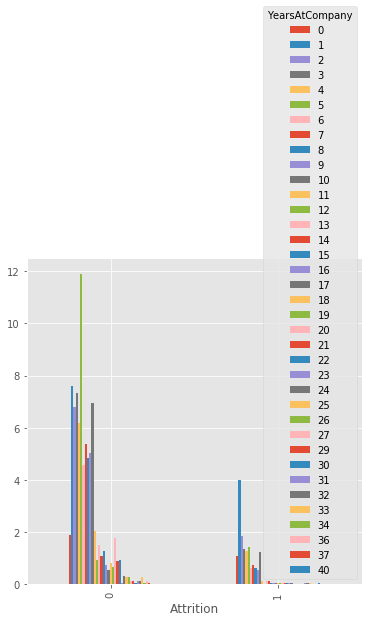

In [663]:
IBM_Attrition_YearsAtCompany = pd.crosstab(IBM['Attrition'],IBM['YearsAtCompany'], rownames=['Attrition'], colnames=['YearsAtCompany'], normalize=True)*100
plot = IBM_Attrition_YearsAtCompany.plot(kind='bar', figsize=(6,6))
plt.show()

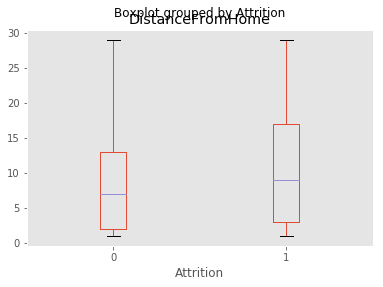

In [664]:
IBM.boxplot(column=['DistanceFromHome'],grid=False,by='Attrition');

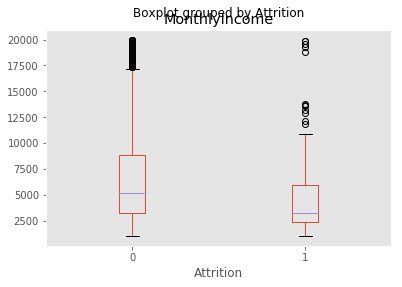

In [665]:
IBM.boxplot(column=['MonthlyIncome'],grid=False,by='Attrition');

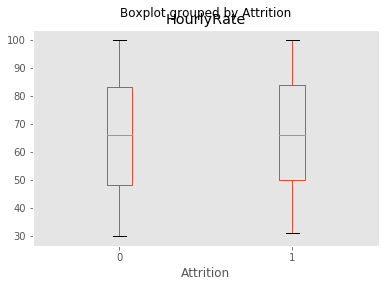

In [666]:
IBM.boxplot(column=['HourlyRate'],grid=False,by='Attrition');

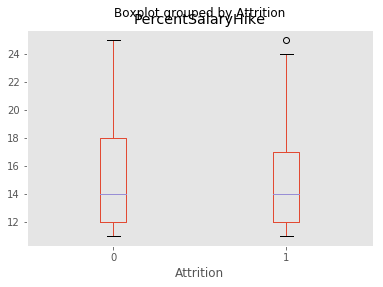

In [667]:
IBM.boxplot(column=['PercentSalaryHike'],grid=False,by='Attrition');

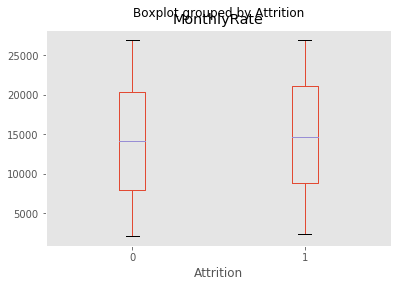

In [668]:
IBM.boxplot(column=['MonthlyRate'],grid=False,by='Attrition');

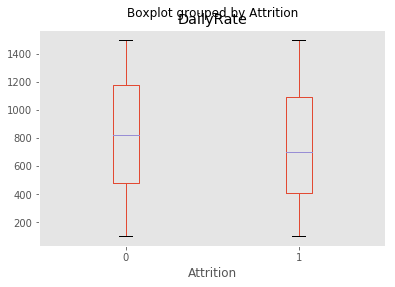

In [669]:
IBM.boxplot(column=['DailyRate'],grid=False,by='Attrition');

In [693]:
x = IBM['Attrition']
y = IBM[['JobInvolvement','JobLevel','EnvironmentSatisfaction','DailyRate','Education','DistanceFromHome','Department','BusinessTravel','HourlyRate','MonthlyIncome']]
result = regress(x,y)
result.summary()

NameError: name 'regress' is not defined

___
* ## **Decision Tree**

In [679]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [688]:
IBM.iloc[:,0:20].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632


In [690]:
IBM.iloc[:,20:35].head()

,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [681]:
X = IBM[['MonthlyIncome','Age','DistanceFromHome']]
y = IBM['Attrition']
decisiontree = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
decisiontree = decisiontree.fit(X,y)
tree.plot_tree(decisiontree)

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [682]:
len(y)

1470

In [683]:
X.shape

(1470, 3)

In [687]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, y)

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'